# codecentric.AI Bootcamp - Random Forests

Hallo und herzlich Willkommen beim codecentric.AI Bootcamp.

Dieses Notebook enthält Beispiele und Übungsaufgaben zu Random Forests.
Eine theoretische Einführung in Random Forests gibt es in diesem [YouTube video](https://www.youtube.com/embed/ieF_QjVUNEQ).

In [ ]:
# lade Video
from IPython.display import IFrame    
IFrame('https://www.youtube.com/embed/ieF_QjVUNEQ', width=850, height=650)

Zu diesem Notebook gibt es ebenfalls ein [Video](https://www.youtube.com/embed/7zeTynbPjkk), indem ich euch durch diese Beispiele durchführe.

In [ ]:
# lade Video
from IPython.display import IFrame    
IFrame('https://www.youtube.com/embed/7zeTynbPjkk', width=850, height=650)

## Bibliotheken

Zunächst laden wir die grundlegenden Pakete, die wir für die Vorbereitung der Daten benötigten. Dazu gehören

- numpy: NumPy ist das wichtigste Paket für maschinelles Lernen in Python, denn es bietet die nötigen Funktionen für die Arbeit mit Matrizen und n-dimensionalen Arrays, linearer Algebra, und mehr.
- pandas: pandas erleichtert das Arbeiten mit Daten in Python.
- matplotlib: Zum Erstellen von Graphiken und Abbildungen aus unseren Daten nutzen wir matplotlib. Den zusätzlichen Befehl `matplotlib inline` geben wir in unserem Juypter Notebook mit, damit wir die generierten Plots unterhalb des Code-Chunks sehen können.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Daten einlesen und vorbereiten

Random Forest ist einer von vielen Machine Learning Algorithmen des überwachten Lernens,
im Englischen "supervised learning" genannt.

Bei überwachtem Lernen nutzen wir sogenannte gelabelte Trainingsdaten.
Das bedeutet, dass wir für jeden unseren Datenpunkte ein bekanntes Ergebnis als
Zielgröße haben. Die Maschine lernt nun also dieses bekannte Ergebnis möglichst gut mit
den vorhandenen Daten abzubilden - sie lernt quasi die optimale mathematische 
Repräsentation der Daten um mit möglichst hoher Genauigkeit auf die Zielgröße zu kommen.
Die gelernte mathematische Repräsentation kann dann auf neue - ungelabelte - Daten
angewandt werden und so für Vorhersagen genutzt werden.

Das Scikit-learn Paket beinhaltet eine Reihe von Datensätzen, die wir direkt einladen und nutzen können. Eine Übersicht über die enthaltenen Datensätze ist hier zu finden: http://scikit-learn.org/stable/datasets/index.html

Hier wollen wir einen Datensatz über Weinqualität nutzen, um zu zeigen, wie man mit Scikit-learn Random Forest Modelle trainiert. Dafür laden wir zunächst das Paket `sklearn.datasets` und daraus die `load_wine` Funktion.

In [3]:
from sklearn.datasets import load_wine

Die `load_wine` Funktion gehört zu den "dataset loaders" und wird genutzt, um kleinere Datensätze (wie unseren hier) zu laden. Die `dir` Funktion zeigt uns welche Attribute unser Objekt hat.

In [4]:
data = load_wine()
dir(data)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

Diese Attribute können wir aufrufen, um spezielle Informationen unseres Objektes zu bekommen. Als erstes wollen wir uns die Beschreibung des Objektes und der Daten ansehen; dafür rufen wir `data.DESCR` auf und lassen es mit dem `print` Befehl ausgeben.

Hier sehen wir nun, wie viele Instanzen wir haben und wie sich diese auf die Klassen verteilen, wie viele Attribute (im Machine Learning nennen wir diese Variablen auch Feature) wir haben und welche das sind. Auch über unsere Antwortvariable (auch Target, Klasse oder Label genannt) bekommen wir Informationen. Darüber hinaus erhalten wir zusammenfassende Statistiken, wie kleinste (Min) und größte (Max) Werte pro Feature, Mittelwert (Mean) und Standardabweichung (standard deviation = SD), Informationen über fehlende Werte, Klassenverteilungen und Autoren mit Veröffentlichungen.

In [5]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

Die Namen der Featurespalten erhalten wir mit `data.feature_names`.

In [6]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Die tatsächlichen Daten (also die Werte für Instanzen und Feature) sind in `data.data` zu finden. Mit der `type` Funktion können wir heraus bekommen, welches Format unsere Daten haben. In diesem Fall handelt es sich um einen NumPy Array.

In [7]:
type(data.data)

numpy.ndarray

Für viele Anwendungsfälle kann es sinnvoll oder nötig sein, die Daten in ein pandas DataFrame umzuwandeln. Hier brauche wir das zwar nicht aber mit der folgenden Funktion könnten wir dies tun:

In [8]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Stattdessen nutzen wir nochmal die `load_wine` Funktion, um die Daten in einem etwas anderen Format einzulesen, dass uns einen Arbeitsschritt für Scikit-learn erspart. Wenn wir `return_X_y=True` setzen, bekommen wir zwei getrennte Objekte zurück:

1. Nur die Feature
2. Nur Target/Antwortvariable

In [9]:
features, target = load_wine(return_X_y=True)
print(features)
print(target)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## Trainings- und Testsets

Als nächstes wollen wir unsere Daten in Trainings- und Testsets aufteilen. Dafür gibt es in `sklearn.model_selection` die `train_test_split` Funktion. Die laden wir wieder ein und geben ihr folgende Argumente mit:

- `features`: die Featurewerte
- `target`: die Antwortvariable
- `test_size`: wie viele der Daten in das Testset sollen (hier 30%)
- `random_state`: Seed für die Pseudozufallsgenerierung von Nummern
- `stratify`: optional, hier sollen Trainings- und Testset die gleichen Proportionen der Klassenverteilungen in unserer Antwortvariablen haben

Mit der Hilfefunktion "?Funktionsname" erhalten wir Informationen über die jeweilige Funktion, ihre Argumente und Anwendungsbeispiele, z.B. `?train_test_split`.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size = 0.30,
                                                    random_state = 42,
                                                    stratify = target)

Der Output von `train_test_split` sind vier Objekte:

- `X_train`: Featurewerte für alle Trainingsinstanzen
- `X_test`: Featurewerte für alle Testinstanzen
- `y_train`: Label/Klassen für alle Trainingsinstanzen
- `y_test`: Label/Klassen für alle Testinstanzen


Wir haben nun 124 Instanzen im Trainingsset und 54 im Testset.

In [12]:
print('Anzahl Instanzen im Trainingsset:', len(y_train))
print('Anzahl Instanzen im Testset:',len(y_test))

Anzahl Instanzen im Trainingsset: 124
Anzahl Instanzen im Testset: 54


## Scikit-learn

[Scikit-learn](http://scikit-learn.org/stable/) ist eine Machine Learning Bibliothek für Python, die das Trainieren von vielen verschiedenen Algorithmen für Klassifikation, Regression, Clustering, und mehr sehr einfach macht. Hier wollen wir Scikit-learn nutzen, um Entscheidungsbäume und Random Forsets zu trainieren.

### Entscheidungsbäume

Random Forest basiert auf Entscheidungsbäumen. Entscheidungsbäume im Machine Learning sind ebenfalls Algorithmen, die genutzt werden können, um Klassifikations- und Regressionsaufgaben zu lernen. Hier seht ihr ein Beispiel für einen einfachen Entscheidungsbaum. Wir nennen diese Methode Entscheidungs**baum** weil die gelernten Regeln mehreren "wenn... dann..." Entscheidungen folgen, an denen die Variablen aufgeteilt werden - ähnlich wie die Verzweigungen eines Astes.

Wir starten nun also mit einem Feature, dass zum Beispiel zufällig ausgewählt wurde. Für dieses Feature wird nun anhand des gesamten Trainingsdatensatzes der optimale Grenzwert gefunden, an dem wir die Verästelung vornehmen. Wäre unser Feature zum Beispiel "Alter", könnte der Grenzwert bei 30 liegen. Alle Datenpunkte, die ein Alter größer als 30 haben folgen jetzt dem linken Ast, alle anderen dem rechten. Danach folgen für alle folgenden Äste weitere Verästelungen, bis wir an einem Endepunkt angekommen sind. Diese Endpunkte werden auch Blätter genannt und repräsentieren das Ergebnis - im Falle einer Klassifikationsaufgabe wäre das die vorhergesagte Klasse.

Entscheidungsbäume lernen also binäre Entscheidungsregeln, die einer logischen Abfolge entsprechen. Das macht sie für uns Menschen sehr intuitiv nachvollziehbar und leicht zu verstehen.

In Scikit-learn gibt es den `DecisionTreeClassifier`, mit dem wir einzelne Entscheidungsbäume trainieren können. Wir definieren dafür erst einen Learner (hier `tree` mit Default Argumenten) und wenden darauf dann die `fit` Funktion an. Die einfachste mögliche Art `fit` zu verwenden ist nur mit `X_train` (den Featuren der Trainingsdaten) und `y_train` (den Labeln/Klassen).

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Die bisher nicht genutzen Testdaten können wir jetzt überprüfen, indem wir sie mit der `predict` Funktion klassifizieren lassen.

In [14]:
y_pred = tree.predict(X_test)

Diese vorhergesagten Klassen können wir nun mit den tatsächlichen Klassen abgleichen, um heraus zu bekommen wie gut unser Entscheidungsbaum gelernt hat. Dafür können wir zum Bespiel eine Kreuzmatrix mit der `confusion_matrix` Funktion verwenden. Um die Darstellung schöner zu machen, konvertiere ich die Kreuzmatrix hier in ein pandas DataFrame und definiere Reihen- und Spaltennamen.

In [15]:
from sklearn.metrics import confusion_matrix

unique_label = np.unique(y_test)
pd.DataFrame(confusion_matrix(y_test, y_pred, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label])

,pred:0,pred:1,pred:2
true:0,17,1,0
true:1,2,19,0
true:2,0,0,15


Einzelne Entscheidungsbäume sind allerdings nicht sehr robust und führen sehr leicht zu Overfitting. Das bedeutet, dass sie zwar die mathematischen Regeln für einen Trainingsdatensatz sehr genau lernen können, sie sind aber häufig nicht in der Lage allgemeingültige Regeln abzuleiten, die auf neue Daten angewandt werden können.
Random Forests sind hier besser, denn sie basieren auf den gesammelten Vorhersagen von vielen Entscheidungsbäumen.

Einfach dargestellt, werden viele verschiedene Entscheidungsbäume auf dem selben Trainingsdatensatz berechnet. Das Endergebnis ergibt sich dann aus den Ergebnissen der einzelnen Bäume.

### Bagging

Was Random Forests besser macht sind vor allem zwei Tricks: zum einen wird bei jeder Verästelung nur eine zufällige Teilmenge der Feature in Betracht gezogen. Das hilft, den Einfluss von stark korrelierten Featuren zu verringern. Der zweite Trick besteht darin, wie die Ergebnisse der einzelnen Entscheidungsbäume zu einem gemeinsamen Endergebnis kombiniert werden.

Im Wesentlichen gibt es zwei Methoden, um Entscheidungsbäume zu kombinieren. Das ist einmal das sogenannten Bagging oder Bootstrap Aggregierung. Bei dieser Methode werden zufällige Teilmengen der Daten genommen, um die einzelnen Bäume zu trainieren. Dabei kann das Sampling der Daten mit oder ohne Zurücklegen passieren. Ein großer Vorteil dieser Methode ist, dass die einzelnen Entscheidungsbäume parallel trainiert werden können, so dass diese Methode sehr schnell und effektiv ist. Bei Random Forest wird in der Regel die Bagging-Methode verwendet.
Das Endergebnis ergibt sich dann entweder aus dem Durchschnitt der Ergebnisse der einzelnen Bäume oder wird durch Mehrheitsvotum bestimmt.

In Scikit-learn gibt es den `BaggingClassifier`,  mit dem wir eine Anzahl von Entscheidungsbäumen trainieren und mit der Baggingmethode kombinieren können. Dafür geben wir der Funktion ein paar Hyperparameter mit:

- `base_estimator`: definiert die Entscheidungsbäume, die genutzt werden sollen (hier der Default `DecisionTreeClassifier` von oben)
- `n_estimators`: Anzahl der zu kombinierenden Bäume
- `max_samples`: Anzahl der Instanzen, die für das Training der einzelnen Entscheidungsbäume zufällig aus dem Trainingsset gesampelt werden sollen (hier 80%)

Außerdem definieren wir wieder einen Random Seed `random_state`. Zusätzliche Argumente und Hyperparameter sind in der Hilfe gelistet (aufzurufen mit `?BaggingClassifier`).

In [16]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator = tree, 
                        n_estimators = 100, 
                        max_samples = 0.8, 
                        random_state = 42)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

Dieses trainierte Modell kann wieder für Vorhersagen auf neuen oder Testdaten verwendet werden.

In [17]:
y_pred_bag = bag.predict(X_test)

unique_label = np.unique(y_test)
pd.DataFrame(confusion_matrix(y_test, y_pred_bag, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label])

,pred:0,pred:1,pred:2
true:0,18,0,0
true:1,0,21,0
true:2,0,0,15


### Random Forests

Mit Scikit-learn können wir auch sehr einfach Klassifikations- und Regressionsmodelle direkt mit dem Random Forest Algorithmus trainieren. 

Die Vorteile von Random Forests sind vor allem die Schnelligkeit, weil das Training parallelisiert durchgeführt werden kann. Viele Aufgaben können mit Random Forests mit recht guter Genauigkeit gelöst werden, so dass wir recht flexibel mit diesem Algorithmus sind. Außerdem bekommen wir als Ergebnis Vorhersagewahrscheinlichkeiten, die uns helfen die Ergebnisse besser einzuschätzen.

Nachteile sind vor allem, dass Random Forests zum Overfitting neigen und vor allem bei stark unbalancierten Daten Probleme haben, die unterrepräsentierte Klasse zu lernen. Und - wie die meisten anderen Machine Learning Algorithmen auch - sind Random Forests Blackbox-Modelle, das heißt, die Entscheidungen sind nicht mehr im Detail nachzuvollziehen.

Je nachdem ob unser bekanntes Ergebnis einer Einteilung in Gruppen, bzw. Klassen entspricht
oder die Zielgröße kontinuierliche Werte darstellen, sprechen wir von Klassifikation
oder Regression. Random Forest kann für beides genutzt werden.

#### Klassifikation

Wenn wir mit Scikit-learn eine Klassifikation durchführen wollen, können wir den `RandomForestClassifier` verwenden. Das Prinzp folgt analog zum `DecisionTreeClassifier` und `BaggingClassifier` von oben:

1. Definition des Algorithmus (hier `RandomForestClassifier` mit Anzahl zu trainierender Bäume)
2. Trainieren des Modell mit `fit`
3. Evaluieren auf Testdaten

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

Für das Vorhersagen von neuen Daten können wir wieder wie zuvor die `predict` Funktion mit `confusion_matrix` verwenden.

In [19]:
y_pred_rf = rf_model.predict(X_test)

unique_label = np.unique(y_test)
pd.DataFrame(confusion_matrix(y_test, y_pred_rf, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label])

,pred:0,pred:1,pred:2
true:0,18,0,0
true:1,0,21,0
true:2,0,0,15


Per Default gibt uns die `predict` Funktion Klassenlabel aus, wir können uns aber auch Vorhersagewahrscheinlichkeiten ausgeben lassen. Dafür gibt es die `predict_proba` Funktion:

In [20]:
rf_model.predict_proba(X_test)[0:10]

array([[0.95, 0.03, 0.02],
       [0.01, 0.97, 0.02],
       [1.  , 0.  , 0.  ],
       [0.98, 0.02, 0.  ],
       [0.81, 0.19, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.01, 0.04, 0.95],
       [0.  , 1.  , 0.  ],
       [0.24, 0.67, 0.09],
       [0.06, 0.23, 0.71]])

Weitere Möglichkeiten, um die Performance eines Modells in Scikit-learn zu bewerten sind [hier](http://scikit-learn.org/stable/modules/model_evaluation.html) aufgezählt.

#### Regression

Der Weindatensatz ist eigentlich für Klassifikationsprobleme gedacht, denn wir wollen die Weinqualität in eine von drei möglichen Klassen eingeteilt vorhersagen. Unser Antwortvariable ist also kategorisch.

Wir könnten Random Forests aber auch verwenden, wenn unsere Antwortvariable numerisch wäre - wir würden dann keine Klassen, sondern numerische Werte vorhersagen. Dafür würden wir den `RandomForestRegressor` verwenden. Die Random Forest Funktionen `RandomForestClassifier` und `RandomForestRegressor` konvertieren die Antwortvariable `y_train` automatisch in das entsprechende Format.

Die `predict` Funktion gibt bei einem Regressionsmodell dann entprechend numerische Werte zurück.

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf_reg_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_reg_model.fit(X_train, y_train)
y_pred_rf_reg = rf_reg_model.predict(X_test)
print(y_pred_rf_reg)

[0.   1.   0.   0.   0.07 0.   2.   1.   0.96 1.86 1.45 0.95 1.99 0.99
 0.   2.   0.97 0.55 1.8  1.98 1.01 1.83 1.98 1.67 1.09 2.   0.02 0.73
 0.   0.88 0.69 0.86 1.9  0.99 0.96 2.   1.11 1.03 1.02 0.2  1.98 0.
 0.   0.   0.   1.08 1.   0.   1.95 0.27 1.01 1.02 2.   0.  ]


Anstelle von Kreuzmatrizen können wir für Regressionsmodelle andere Metriken verwenden, z.B. den mittleren Fehler oder die Wurzel daraus, den Logloss, absoluten Fehler oder andere. Eine Liste ist [hier](http://scikit-learn.org/stable/modules/model_evaluation.html) zu finden.

Hier verwenden wir z.B. den mittleren Fehler:

In [22]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_rf_reg)

0.02690185185185185

Wir können Vorhersage gegen Wirklichkeit auch graphisch darstellen, z.B. als Scatterplot:

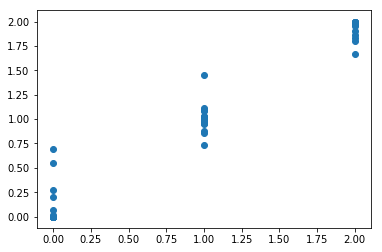

In [23]:
plt.scatter(y_test, y_pred_rf_reg)

Wir können uns auch einzelne Entscheidungsbäume als Baum darstellen lassen. Dafür gibt es die `export_graphviz` Funktion und das pydot Paket.

Mit `rf_reg_model.estimators_[index]` können wir einzelne Bäume unseres Modell extrahieren und als .dot Datei exportieren.

In [ ]:
from sklearn.tree import export_graphviz
import pydot

# 5. Baum extrahieren
tree_est = rf_reg_model.estimators_[5]

# In .dot exportieren
export_graphviz(tree_est, out_file = 'tree.dot', feature_names = data.feature_names, rounded = True, precision = 1)

Diese .dot Datei können wir z.B. auf http://www.webgraphviz.com/ visualisieren.

## H2O

[H2O](https://www.h2o.ai/) ist eine beliebte Open-Source Machine Learning Plattform, mit der man ebenfalls sehr einfach und schnell Random Forests trainieren und tunen kann.

Im Unterschied zu Scikit-learn läuft H2O auf Clustern mit einem Java Backend. Wir können unser Cluster lokal starten oder z.B. mit Spark, Hadoop oder anderen Umgebungen. Je nachdem, wie rechenintensiv unsere Modelle sind, können wir durch das Nutzen von mehreren Clustern und Knoten eine deutlich schnellere Trainingszeit erreichen als mit Scikit-learn.

Zunächst importieren wir die h2o Bibliothek und starten das Cluster. Mit `nthreads = -1` werden alle Kerne einer Machine genutzt.

In [24]:
import h2o
h2o.init(nthreads = -1)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_181"; OpenJDK Runtime Environment (build 1.8.0_181-8u181-b13-1~deb9u1-b13); OpenJDK 64-Bit Server VM (build 25.181-b13, mixed mode)
  Starting server from /usr/local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp1nf3wz62
  JVM stdout: /tmp/tmp1nf3wz62/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp1nf3wz62/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.8
H2O cluster version age:,1 month and 23 days
H2O cluster name:,H2O_from_python_unknownUser_7uaudp
H2O cluster total nodes:,1
H2O cluster free memory:,444.5 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In h2o gibt es auch wieder [mehrere Algorithmen](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science.html), die zum Trainieren von Modellen genutzt werden können. Für h2o ist das die `H2ORandomForestEstimator` Funktion.

In [25]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

Dieses Mal starten wir mit dem pandas DataFrame `df`, das wir zu Anfang aus dem numpy Array generiert haben:

In [26]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Dieses DataFrame enthält bisher nur die Feature, darum kombiniere ich es hier mit der Antwortvariablen, indem ich diese ebenfalls in ein pandas DataFrame schreibe und die Spalten dieser beiden DataFrame mit `pd.concat` verbinde. Die erste Spalte `class` enthält jetzt also die vorherzusagenden Klassen.

In [27]:
target = pd.DataFrame({'class':data.target})

df_c = pd.concat([target, df], axis=1)
df_c.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Bevor wir mit h2o arbeiten können, müssen wir unsere Daten in ein H2O Frame konvertieren. Dafür gibt es die `h2o.H2OFrame` Funktion. Unsere Antwortvariable ist im Moment noch numerisch, h2o würde also eine Regression durchführen. Wir wollen aber eine Klassifikation trainieren, darum konvertiere ich die Variable mit `asfactor`. Mit `describe` bekommen wir eine umfangreiche Beschreibung der Daten.

In [28]:
hf = h2o.H2OFrame(df_c)
hf[0] = hf[0].asfactor()  
hf[0].isfactor()

/usr/local/lib/python3.6/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%


[True]

In [29]:
hf.describe()

Rows:178
Cols:14




,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
type,enum,real,real,real,real,int,real,real,real,real,real,real,real,int
mins,,11.03,0.74,1.36,10.6,70.0,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.0
mean,,13.000617977528085,2.336348314606743,2.366516853932584,19.494943820224723,99.74157303370781,2.295112359550562,2.0292696629213474,0.36185393258426946,1.5908988764044947,5.058089882022471,0.9574494382022474,2.6116853932584254,746.8932584269659
maxs,,14.83,5.8,3.23,30.0,162.0,3.88,5.08,0.66,3.58,13.0,1.71,4.0,1680.0
sigma,,0.811826538005858,1.1171460976144625,0.27434400906081485,3.339563767173504,14.282483515295652,0.6258510488339892,0.9988586850169471,0.12445334029667941,0.5723588626747612,2.318285871822413,0.22857156582982327,0.7099904287650503,314.9074742768492
zeros,,0,0,0,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.2,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185.0


Auch in h2o können wir unsere Daten sehr einfach in Trainings- und Testsets einteilen. Zu Demonstrationszwecken teile ich die Daten hier in drei Sets ein: Training, Validierung und Test. Bei der geringen Anzahl an Instanzen ist das aber eigentlich nicht sinnvoll - wir würden stattdessen Kreuzvalidierung verwenden.

Die `split_frame` Funktion bekommt einen Vektor von Werten zwischen 0 und 1, die in Summe weniger als 1 sein müssen. Diese Werte stellen den Anteil der Daten für das Trainingsset (hier 70%), das Validierungsset (hier 15%) und das Testset (die verbleibenden 15%) dar. Die drei Datensets bekommen wir als separate Objekte zurück.

In [30]:
train, valid, test = hf.split_frame([0.7, 0.15], seed=42)

Zur Vorbereitung definieren wir nun auch noch einen Vektor mit allen Featurenamen (Spaltennamen), die wir zum Trainieren verwenden wollen:

In [31]:
hf_X = hf.col_names[1:len(hf.col_names)]
hf_X

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Außerdem generieren wir noch einen mit der Antwortvariablen:

In [32]:
hf_y = hf.col_names[0]
hf_y

'class'

Nun können wir den `H2ORandomForestEstimator` definieren. Weitere Hyperparameter sind in der Funktionsbeschreibung unter http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/drf.html gelistet. Wenn wir in diese Liste gucken, sehen wir direkt, dass wir eine ganze Menge an Hyperparametern und zusätzlichen Optionen wählen können. Hier wählen wir ein paar:

- `ntrees`: Anzahl Entscheidungsbäume
- `max_depth`: Maximale Baumtiefe
- `min_rows`: Minimale Anzahl an Instanzen pro Blatt

Außerdem geben wir der Funktion noch Stopp-Kriterien mit, die angeben, wann das Training abgebrochen werden soll. Hier wollen wir das Training unterbrechen, wenn der mittlere Fehler pro Klasse `mean_per_class_error` 3x hintereinander nicht mindestens um 0.001 besser wird.

In [33]:
rf = H2ORandomForestEstimator(
    ntrees = 200,
    max_depth = 3,
    min_rows = 5,
    stopping_rounds = 3,
    stopping_metric = 'mean_per_class_error',
    stopping_tolerance = 1e-3,
    seed = 42
)

Mit `train` erfolgt dann das eigentliche Traineren des Modells. Wenn wir mit einem Validierungsset arbeiten, wie hier, geben wir dieses neben dem Trainingsset an. Falls wir kein Validierungsset hätten und Kreuzvalidierung durchführen wollten, würden wir statt `validation_frame` die Argumente `nfolds` (Anzahl Folds) im H2ORandomForestEstimator setzen. Die Namen der Spalten für Feature und Antwortvariablen geben wir mit `x` und `y`.

In [34]:
rf.train(x = hf_X, 
         y = hf_y, 
         training_frame = train, 
         validation_frame = valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


Abbilden können wir die Entwicklung mehrerer Performance-Metriken auf Validierungsdaten über die Trainingszyklen mit `score_history` und matplotlib:

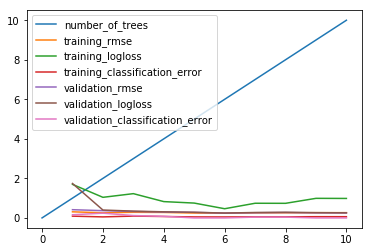

In [35]:
sh = rf.score_history()
sh.plot()

Eine Übersicht über die Performance unseres Modells auf den Testdaten erhalten wir mit der `model_performance` Funktion:

In [36]:
performance = rf.model_performance(test_data=test)
print(performance)


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.0595180965487881
RMSE: 0.24396330984143516
LogLoss: 0.23992978191902167
Mean Per-Class Error: 0.0
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



0,1,2,Error,Rate
9.0,0.0,0.0,0.0,0 / 9
0.0,10.0,0.0,0.0,0 / 10
0.0,0.0,5.0,0.0,0 / 5
9.0,10.0,5.0,0.0,0 / 24


Top-3 Hit Ratios: 


k,hit_ratio
1,1.0
2,1.0
3,1.0


Vorhersagen auf Testdaten erhalten wir wieder mit der `predict` Funktion:

In [37]:
rf.predict(test)

drf prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1,p2
0,0.942857,0.0560262,0.00111662
0,0.801387,0.0347439,0.163869
0,0.624113,0.375165,0.000721843
0,0.502701,0.496356,0.000942644
0,0.942857,0.0560262,0.00111662
0,0.624143,0.37516,0.00069741
0,0.841725,0.0490624,0.109213
0,0.925722,0.0537214,0.0205571
0,0.84373,0.155242,0.00102766
1,0.0741453,0.916943,0.00891169
